In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1, 3, 3, 1)


2022-07-30 13:08:49.676418: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


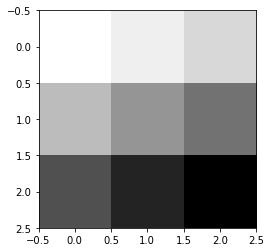

In [3]:
sess = tf.InteractiveSession()
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)

print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='Greys')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


2022-07-30 13:16:22.380232: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


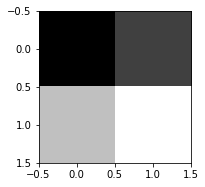

In [5]:
# print("image: \n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval() # tensor 실행
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2, 2), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


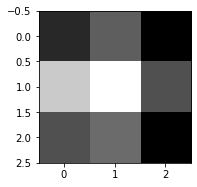

In [6]:
# Simple convolution layer - zero padding
print("image.shape", image.shape)

weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

### 3 filters (2, 2, 1, 3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


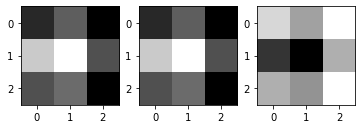

In [7]:
print("image.shape", image.shape)

weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]],
                      [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')

## Max Pooling

In [8]:
image = np.array([[[[4], [4]],
                  [[2], [1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                     strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [4.]]

  [[2.]
   [1.]]]]


## MNIST image loading

In [19]:
mnist = tf.keras.datasets.mnist

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

TypeError: Input 'filter' of 'Conv2D' Op has type float32 that does not match type float64 of argument 'input'.

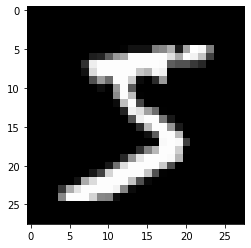

In [21]:
img = x_train[0].reshape(28,28)
plt.imshow(img, cmap='gray')

img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random.normal([3,3,1,5],stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1],padding='SAME')

conv2d_img = np.swapaxes(conv2d,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14),cmap='gray')

pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
pool_img = np.swapaxes(pool, 0, 3)

for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7),cmap='gray')